In [3]:
library(tidyverse)
library(igraph)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘igraph’


The following objects are masked from ‘package:lubridate’:

    %--%, union


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats

Part 1: Facebook

In [19]:
#Loading Data
edges <- read.table("/Users/angie/Desktop/facebook_combined.txt")
Facebook <- graph.data.frame(edges, directed = FALSE)

In [36]:
# number of nodes
vcount(Facebook)
#number of edges
ecount(Facebook)
#Diameter
is.connected(Facebook) #facebook network is connected
diameter(Facebook)
#Degree distribution
deg <- degree(Facebook)
hist(deg, main = "Degree Distribution", xlab = "degree", ylab = "frequency", breaks = 25)
mean(deg)
#log log plot
dist <- data.frame(table(deg))%>%
  mutate(deg = as.numeric(as.character(deg)))
plot(x = log(dist$deg), y = log(dist$Freq), main = "Log Log Degree Distribution", xlab = "log(Degree)", ylab = "log(Frequency)")

ERROR: Error in parse(text = x, srcfile = src): <text>:9:27: unexpected INCOMPLETE_STRING
18:   mutate(degree = as.numeric(as.character(deg)))
19: plot(x = log(dist$deg), y = log(dist$Freq), main = "Log Log Degree Distribution")
                              ^


Personalised Network

In [21]:
#ego graph node 1
ego1 <- make_ego_graph(Facebook, order = 1, nodes = "0")
#Vertices and Edges
vcount(ego1[[1]])
ecount(ego1[[1]])
#Diameter
diameter(ego1[[1]])

The diameter is 2 
The trivial upper bound is 347 
The trivial lower bound is 1 


Trivial lower bound would mean that the ego graph is a star network centred around 1 because the "shortest longest path" for every node is to go through node 1. Trivial upper bound would be achieved in a circle network

In [13]:
# Core nodes
n_core <- sum(deg>200)
cat("The number of core nodes is", n_core, "\n")

#mean degree
core <- which(deg > 200)
core_degree <- deg[core]
mean(core_degree)
cat("There are 40 core nodes", "\n")

ERROR: Error in eval(expr, envir, enclos): object 'deg' not found


Community structure of selected core nodes

The modularity of node 1 communities (F&G) is 0.4131014 


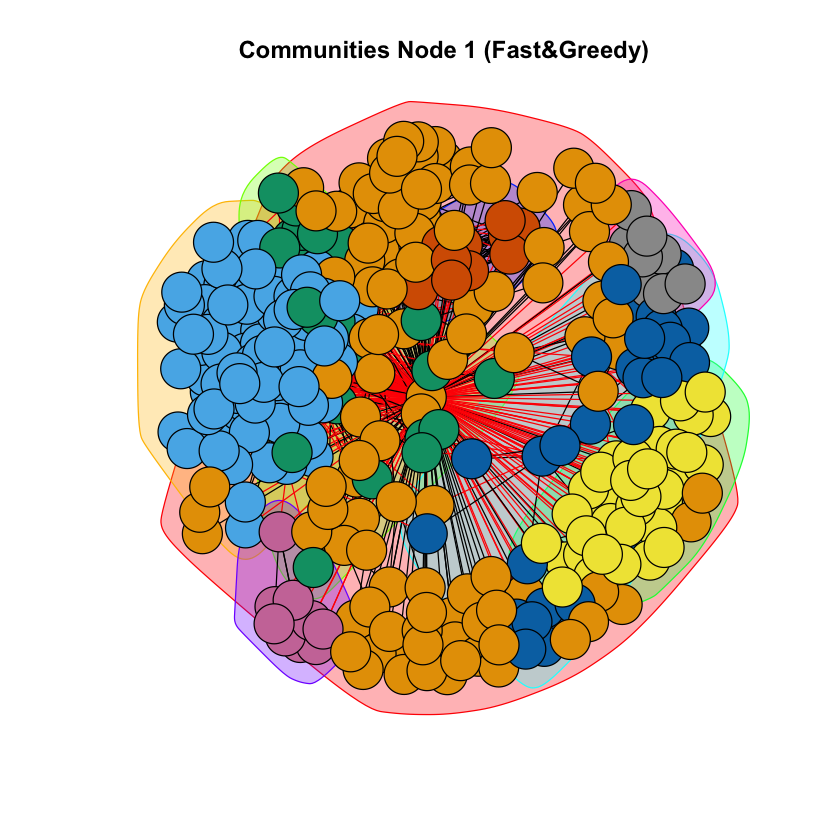

The modularity of node 1 communities (EB) is 0.3533022 


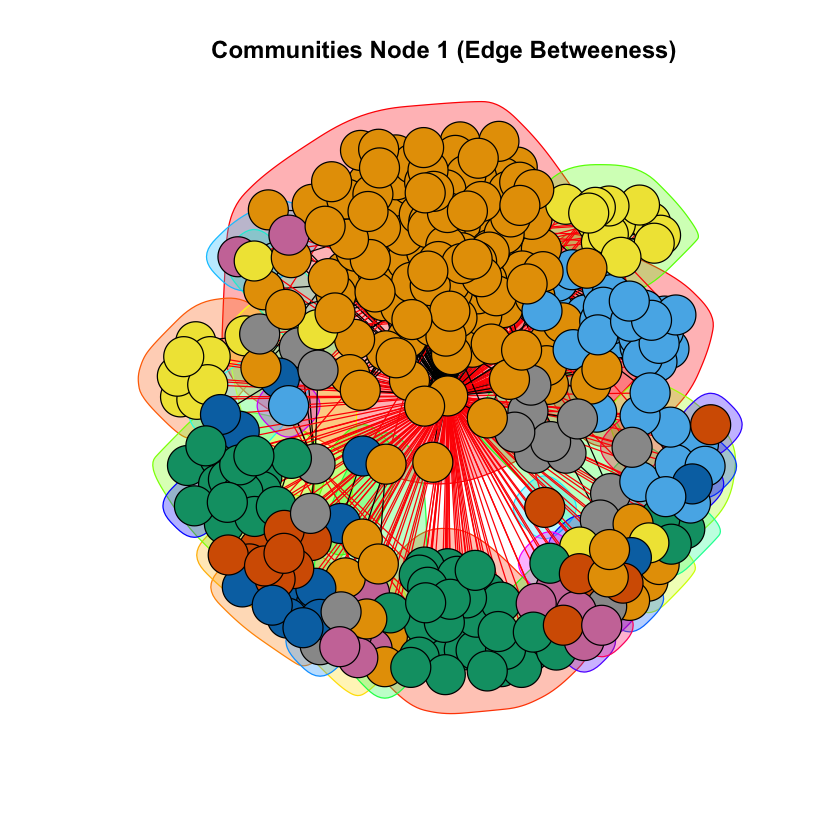

The modularity of node 1 communities (IM) is 0.3941254 


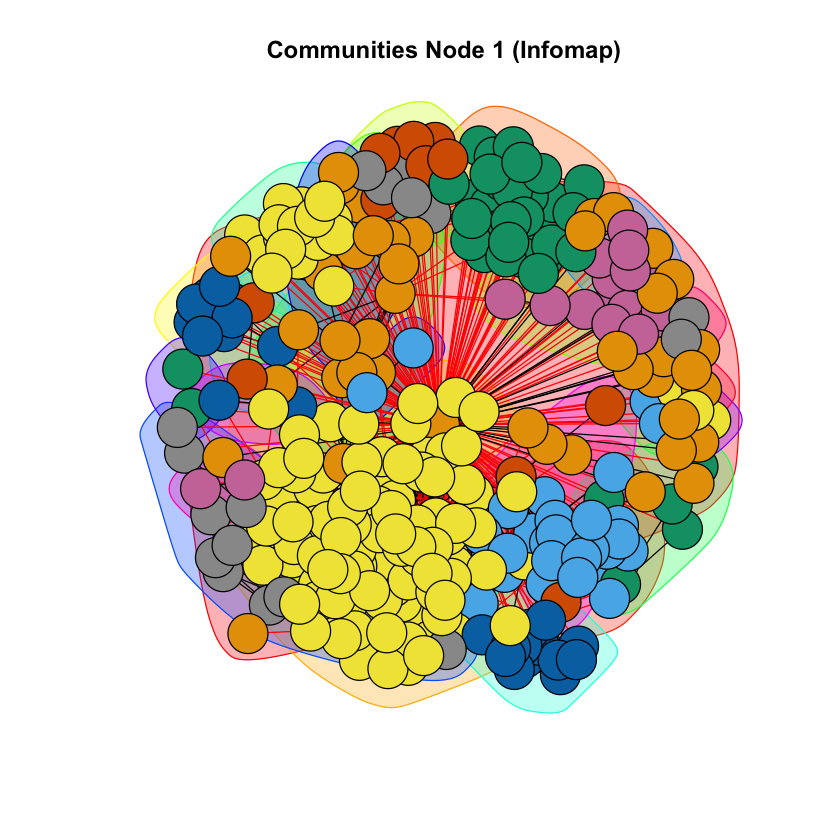

The modularity of node 108 communities (F&G) is 0.4359294 


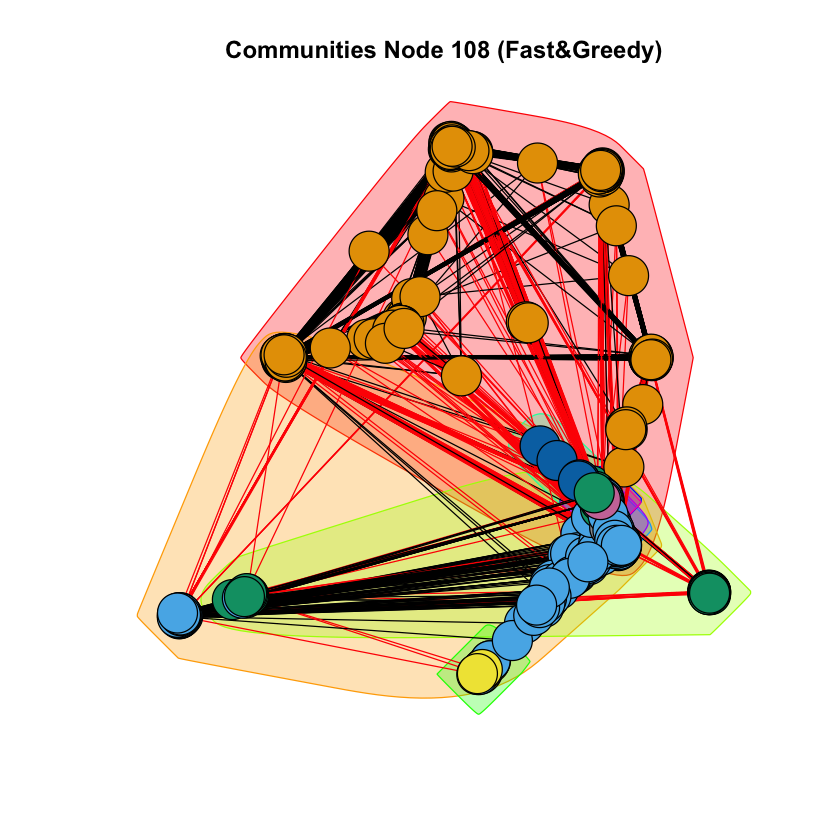

The modularity of node 108 communities (EB) is 0.5067549 


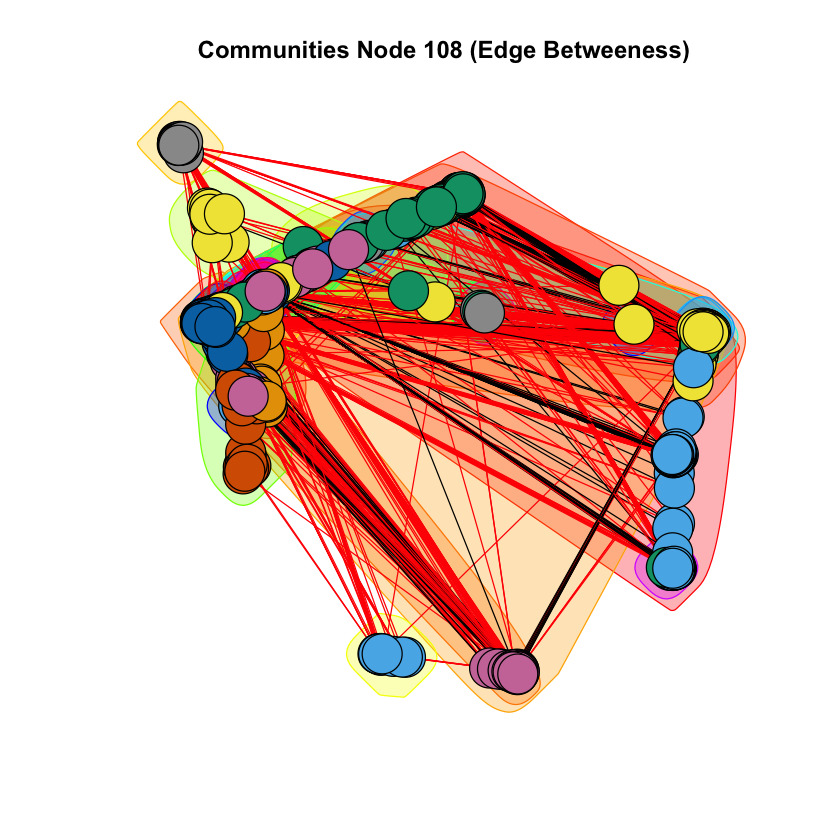

The modularity of node 1 communities (IM) is 0.3941254 


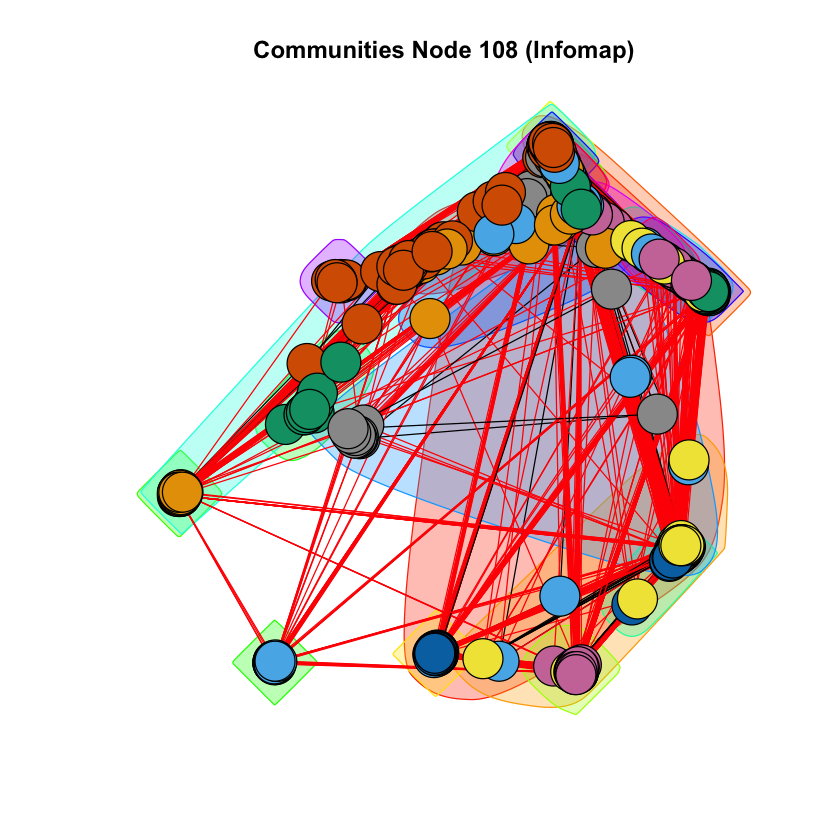

The modularity of node 349 communities (F&G) is 0.2502104 


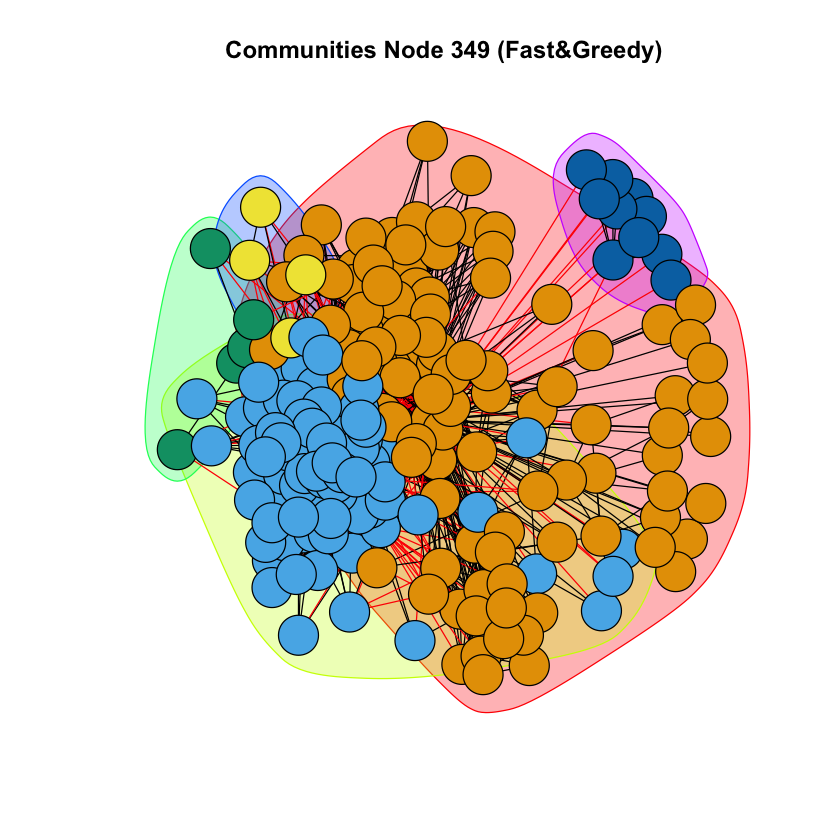

The modularity of node 349 communities (EB) is 0.3533022 


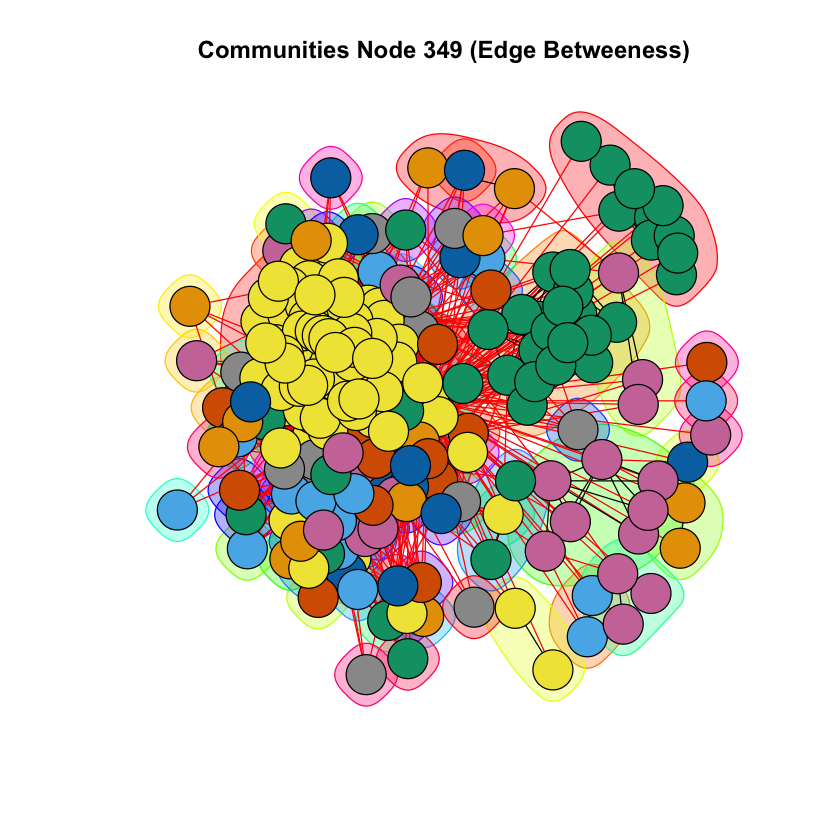

The modularity of node 349 communities (IM) is 0.3941254 


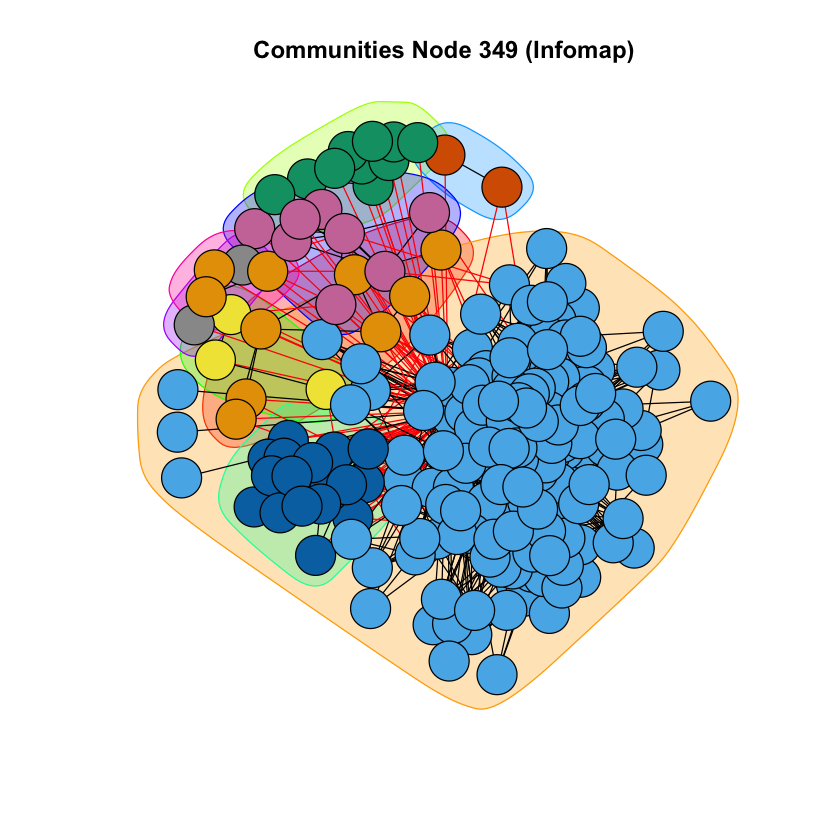

The modularity of node 484 communities (F&G) is 0.5070016 


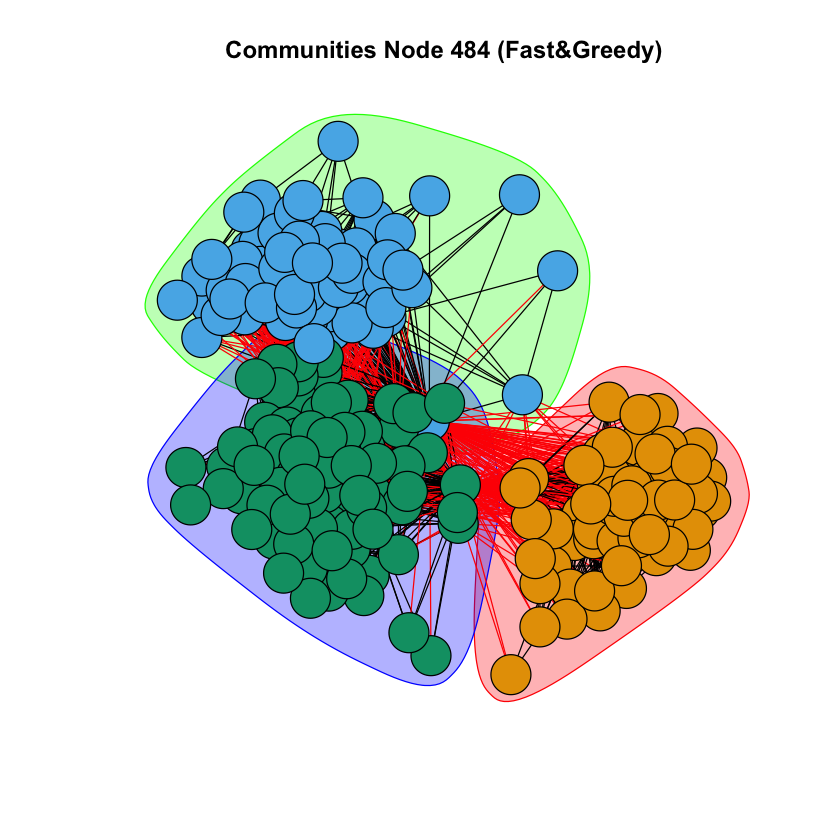

The modularity of node 484 communities (EB) is 0.4890952 


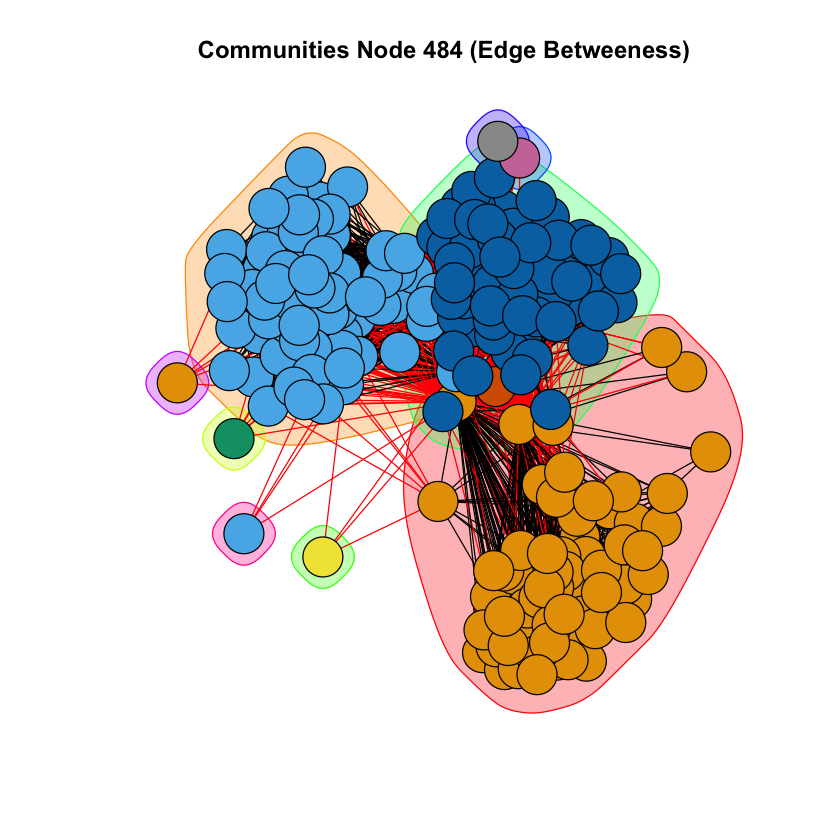

The modularity of node 484 communities (F&G) is 0.5070016 


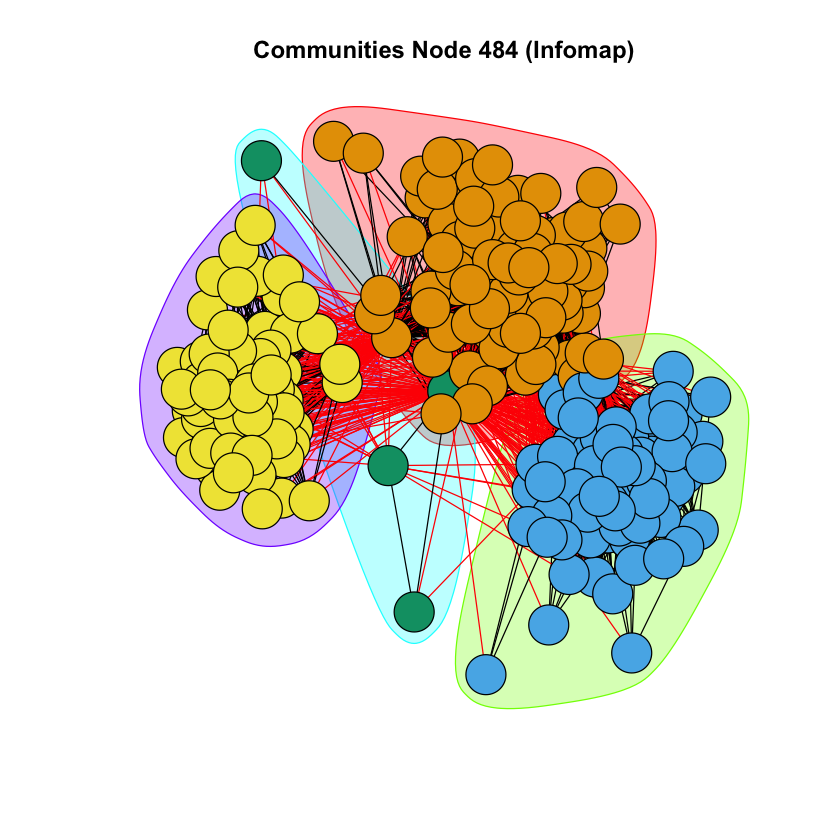

The modularity of node 1087 communities (F&G) is 0.1455315 


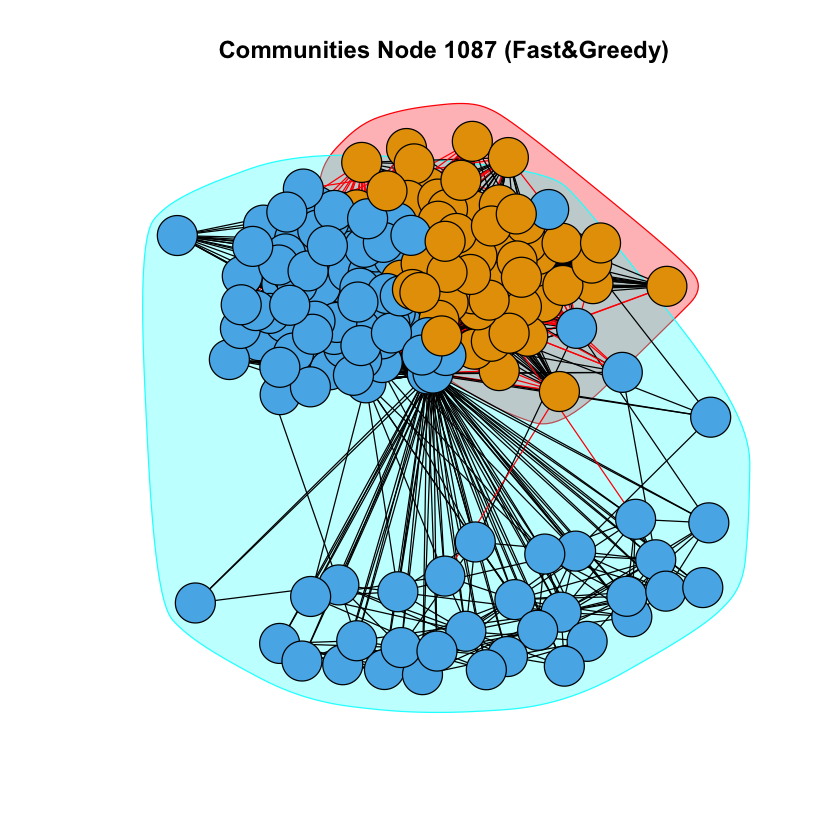

The modularity of node 1087 communities (EB) is 0.02762377 


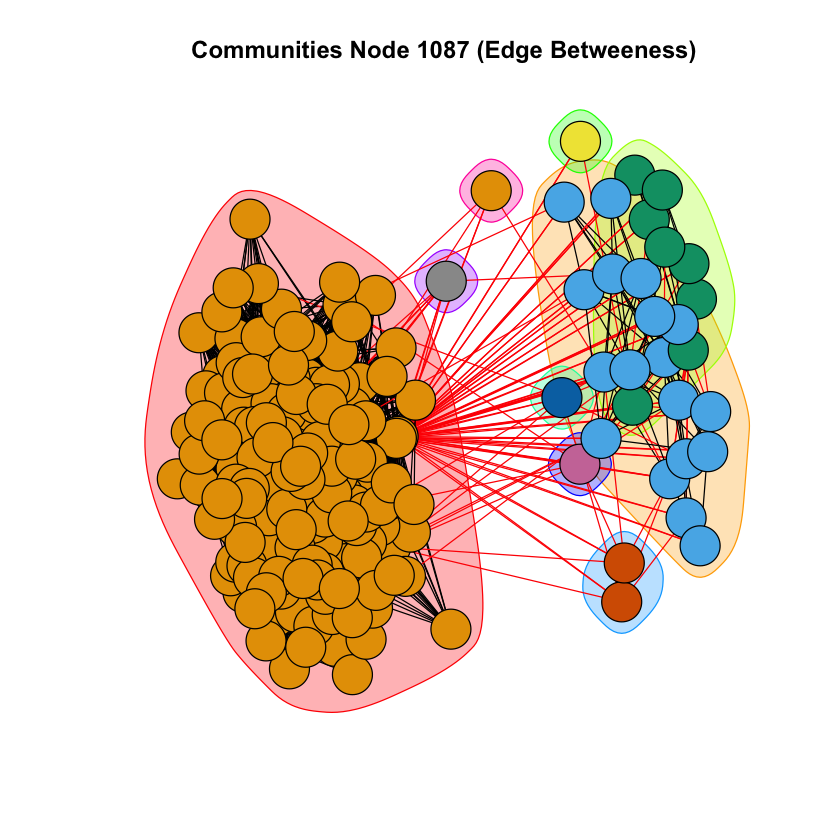

The modularity of node 1087 communities (IM) is 0.02690662 


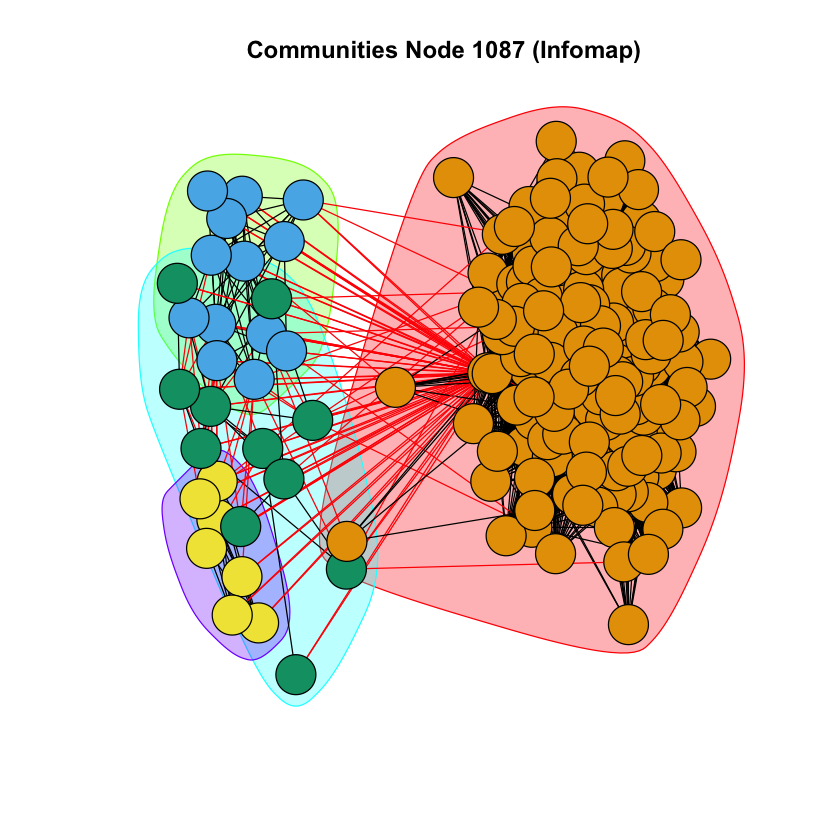

In [37]:
#Node 1
comm1_FG <- cluster_fast_greedy(ego1[[1]])
mod1_FG <- modularity(comm1_FG)
plot(comm1_FG, ego1[[1]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1 (Fast&Greedy)" )
cat("The modularity of node 1 communities (F&G) is", mod1_FG, "\n")

comm1_EB <- cluster_edge_betweenness(ego1[[1]])
mod1_EB <- modularity(comm1_EB)
plot(comm1_EB, ego1[[1]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1 (Edge Betweeness)")
cat("The modularity of node 1 communities (EB) is", mod1_EB, "\n")

comm1_IM <- cluster_infomap(ego1[[1]])
mod1_IM <- modularity(comm1_IM)
plot(comm1_IM, ego1[[1]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1 (Infomap)")
cat("The modularity of node 1 communities (IM) is", mod1_IM, "\n")

#The other 4 ego networks
egos <- make_ego_graph(Facebook, order = 1, nodes = c("107", "348", "483", "1086"))

#Node 108
comm108_FG <- cluster_fast_greedy(egos[[1]])
mod108_FG <- modularity(comm108_FG)
plot(comm108_FG, egos[[1]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 108 (Fast&Greedy)" )
cat("The modularity of node 108 communities (F&G) is", mod108_FG, "\n")

comm108_EB <- cluster_edge_betweenness(egos[[1]])
mod108_EB <- modularity(comm108_EB)
#plot(comm108_EB, egos[[1]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 108 (Edge Betweeness)")
#cat("The modularity of node 108 communities (EB) is", mod108_EB, "\n")

comm108_IM <- cluster_infomap(egos[[1]])
mod108_IM <- modularity(comm108_IM)
plot(comm108_IM, egos[[1]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 108 (Infomap)")
cat("The modularity of node 1 communities (IM) is", mod1_IM, "\n")

#Node 349
comm349_FG <- cluster_fast_greedy(egos[[2]])
mod349_FG <- modularity(comm349_FG)
plot(comm349_FG, egos[[2]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 349 (Fast&Greedy)" )
cat("The modularity of node 349 communities (F&G) is", mod349_FG, "\n")

comm349_EB <- cluster_edge_betweenness(egos[[2]])
mod349_EB <- modularity(comm349_EB)
plot(comm349_EB, egos[[2]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 349 (Edge Betweeness)")
cat("The modularity of node 349 communities (EB) is", mod1_EB, "\n")

comm349_IM <- cluster_infomap(egos[[2]])
mod348_IM <- modularity(comm349_IM)
plot(comm349_IM, egos[[2]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 349 (Infomap)")
cat("The modularity of node 349 communities (IM) is", mod1_IM, "\n")

#Node 484
comm484_FG <- cluster_fast_greedy(egos[[3]])
mod484_FG <- modularity(comm484_FG)
plot(comm484_FG, egos[[3]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 484 (Fast&Greedy)" )
cat("The modularity of node 484 communities (F&G) is", mod484_FG, "\n")

comm484_EB <- cluster_edge_betweenness(egos[[3]])
mod484_EB <- modularity(comm484_EB)
plot(comm484_EB, egos[[3]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 484 (Edge Betweeness)")
cat("The modularity of node 484 communities (EB) is", mod484_EB, "\n")

comm484_IM <- cluster_infomap(egos[[3]])
mod484_IM <- modularity(comm484_IM)
plot(comm484_IM, egos[[3]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 484 (Infomap)")
cat("The modularity of node 484 communities (F&G) is", mod484_IM, "\n")

#Node 1087
comm1087_FG <- cluster_fast_greedy(egos[[4]])
mod1087_FG <- modularity(comm1087_FG)
plot(comm1087_FG, egos[[4]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1087 (Fast&Greedy)" )
cat("The modularity of node 1087 communities (F&G) is", mod1087_FG, "\n")

comm1087_EB <- cluster_edge_betweenness(egos[[4]])
mod1087_EB <- modularity(comm1087_EB)
plot(comm1087_EB, egos[[4]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1087 (Edge Betweeness)")
cat("The modularity of node 1087 communities (EB) is", mod1087_EB, "\n")

comm1087_IM <- cluster_infomap(egos[[4]])
mod1087_IM <- modularity(comm1087_IM)
plot(comm1087_IM, egos[[4]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1087 (Infomap)")
cat("The modularity of node 1087 communities (IM) is", mod1087_IM, "\n")

In [ ]:
#Removing egos

#Node 1
g1_removed <- delete.vertices(ego1[[1]], "0")

comm1_FG_Removed <- cluster_fast_greedy(g1_removed)
modularity(comm1_FG_Removed)
plot(comm1_FG_Removed, g1_removed, vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1 (Fast&Greedy, ego removed)")

comm1_EB_Removed <- cluster_edge_betweenness(g1_removed)
modularity(comm1_EB_Removed)
plot(comm1_EB_Removed, g1_removed,vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1 (Edge Betweeness, ego removed)")

comm1_IM_Removed <- cluster_infomap(g1_removed)
modularity(comm1_IM_Removed)
plot(comm1_IM_Removed, g1_removed,vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1 (Infomap, ego removed)")

#Node 108
g108_removed <- delete.vertices(egos[[1]], "107")

comm108_FG_Removed <- cluster_fast_greedy(g108_removed)
modularity(comm108_FG_Removed)
plot(comm108_FG_Removed, g108_removed, vertex.label=NA, edge.arrow.size=0, main = "Communities Node 108 (Fast&Greedy, ego removed)")

comm108_EB_Removed <- cluster_edge_betweenness(g108_removed)
modularity(comm108_EB_Removed)
plot(comm108_EB_Removed, g108_removed,vertex.label=NA, edge.arrow.size=0, main = "Communities Node 108 (Edge Betweeness, ego removed)")

comm108_IM_Removed <- cluster_infomap(g108_removed)
modularity(comm108_IM_Removed)
plot(comm108_IM_Removed, g108_removed,vertex.label=NA, edge.arrow.size=0, main = "Communities Node 108 (Infomap, ego removed)")

#Node 349
g349_removed <- delete.vertices(egos[[2]], "348")

comm349_FG_Removed <- cluster_fast_greedy(g349_removed)
modularity(comm349_FG_Removed)
plot(comm349_FG_Removed, g349_removed, vertex.label=NA, edge.arrow.size=0, main = "Communities Node 349 (Fast&Greedy, ego removed)")

comm349_EB_Removed <- cluster_edge_betweenness(g349_removed)
modularity(comm349_EB_Removed)
plot(comm349_EB_Removed, g349_removed,vertex.label=NA, edge.arrow.size=0, main = "Communities Node 349 (Edge Betweeness, ego removed)")

comm349_IM_Removed <- cluster_infomap(g349_removed)
modularity(comm349_IM_Removed)
plot(comm108_IM_Removed, g108_removed,vertex.label=NA, edge.arrow.size=0, main = "Communities Node 349 (Infomap, ego removed)")

#Node 484
g484_removed <- delete.vertices(egos[[3]], "483")

comm484_FG_Removed <- cluster_fast_greedy(g484_removed)
modularity(comm484_FG_Removed)
plot(comm484_FG_Removed, g484_removed, vertex.label=NA, edge.arrow.size=0, main = "Communities Node 484 (Fast&Greedy, ego removed)")

comm484_EB_Removed <- cluster_edge_betweenness(g484_removed)
modularity(comm484_EB_Removed)
plot(comm484_EB_Removed, g484_removed,vertex.label=NA, edge.arrow.size=0, main = "Communities Node 484 (Edge Betweeness, ego removed)")

comm484_IM_Removed <- cluster_infomap(g484_removed)
modularity(comm484_IM_Removed)
plot(comm484_IM_Removed, g484_removed,vertex.label=NA, edge.arrow.size=0, main = "Communities Node 484 (Infomap, ego removed)")

#Node 1087
g1087_removed <- delete.vertices(egos[[4]], "1086")

comm1087_FG_Removed <- cluster_fast_greedy(g1087_removed)
modularity(comm1087_FG_Removed)
plot(comm1087_FG_Removed, g1087_removed, vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1087 (Fast&Greedy, ego removed)")

comm1087_EB_Removed <- cluster_edge_betweenness(g1087_removed)
modularity(comm1087_EB_Removed)
plot(comm1087_EB_Removed, g1087_removed,vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1087 (Edge Betweeness, ego removed)")

comm1087_IM_Removed <- cluster_infomap(g1087_removed)
modularity(comm1087_IM_Removed)
plot(comm1087_IM_Removed, g1087_removed,vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1087 (Infomap, ego removed)")

Embeddedness and Dispersion

In [ ]:
#Node 1
nodes1 <- V(ego1[[1]])$name
embedded1 <- c()
dispersion1 <- c()
j = 1
for (i in nodes1){
  common_neighbours <- intersection(neighbors(ego1[[1]], "0"), neighbors(ego1[[1]], i))
  common_neighbours <-common_neighbours$name
  embedded1[j] <- length(common_neighbours)
  g_removed <- delete_vertices(ego1[[1]], c("0",i))
  dist <- distances(g_removed, v = common_neighbours, to = common_neighbours)
  dist[is.infinite(dist)] <- 0
  dispersion1[j] <- sum(dist, na.rm = T)
  j <- j+1
}
hist(embedded1, main = "Distribution of Embeddedness Node 1", breaks = 50)
hist(dispersion1, main = "Distribution of Dispersion Node 1", breaks = 50)

#Node 108
nodes108 <- V(egos[[1]])$name
embedded108 <- c()
dispersion108 <- c()
j = 1
for (i in nodes108){
  common_neighbours <- intersection(neighbors(egos[[1]], "107"), neighbors(egos[[1]], i))
  common_neighbours <-common_neighbours$name
  embedded108[j] <- length(common_neighbours)
  g_removed <- delete_vertices(egos[[1]], c("107",i))
  dist <- distances(g_removed, v = common_neighbours, to = common_neighbours)
  dist[is.infinite(dist)] <- 0
  dispersion108[j] <- sum(dist, na.rm = T)
  j <- j+1
}
hist(embedded108, main = "Distribution of Embeddedness Node 108", breaks = 50)
hist(dispersion108, main = "Distribution of Dispersion Node 108", breaks = 50)

#Node 349
nodes349 <- V(egos[[2]])$name
embedded349 <- c()
dispersion349 <- c()
j = 1
for (i in nodes349){
  common_neighbours <- intersection(neighbors(egos[[2]], "348"), neighbors(egos[[2]], i))
  common_neighbours <-common_neighbours$name
  embedded349[j] <- length(common_neighbours)
  g_removed <- delete_vertices(egos[[2]], c("348",i))
  dist <- distances(g_removed, v = common_neighbours, to = common_neighbours)
  dist[is.infinite(dist)] <- 0
  dispersion349[j] <- sum(dist, na.rm = T)
  j <- j+1
}
hist(embedded349, main = "Distribution of Embeddedness Node 349", breaks = 50)
hist(dispersion349, main = "Distribution of Dispersion Node 349", breaks = 50)

#Node 484
nodes484 <- V(egos[[3]])$name
embedded484 <- c()
dispersion484 <- c()
j = 1
for (i in nodes484){
  common_neighbours <- intersection(neighbors(egos[[3]], "483"), neighbors(egos[[3]], i))
  common_neighbours <-common_neighbours$name
  embedded484[j] <- length(common_neighbours)
  g_removed <- delete_vertices(egos[[3]], c("483",i))
  dist <- distances(g_removed, v = common_neighbours, to = common_neighbours)
  dist[is.infinite(dist)] <- 0
  dispersion484[j] <- sum(dist, na.rm = T)
  j <- j+1
}
hist(embedded484, main = "Distribution of Embeddedness Node 484", breaks = 50)
hist(dispersion484, main = "Distribution of Dispersion Node 484", breaks = 50)

#Node 1087
nodes1087 <- V(egos[[4]])$name
embedded1087 <- c()
dispersion1087 <- c()
j = 1
for (i in nodes1087){
  common_neighbours <- intersection(neighbors(egos[[4]], "1086"), neighbors(egos[[4]], i))
  common_neighbours <-common_neighbours$name
  embedded1087[j] <- length(common_neighbours)
  g_removed <- delete_vertices(egos[[4]], c("1086",i))
  dist <- distances(g_removed, v = common_neighbours, to = common_neighbours)
  dist[is.infinite(dist)] <- 0
  dispersion1087[j] <- sum(dist, na.rm = T)
  j <- j+1
}
hist(embedded1087, main = "Distribution of Embeddedness Node 1087", breaks = 50)
hist(dispersion1087, main = "Distribution of Dispersion Node 1087", breaks = 50)

Highlighting max embeddedness, dispersion and ratio

In [ ]:
#1
data1 <- data.frame(nodes1, embedded1, dispersion1)%>%
  mutate(disp_embed = dispersion1/embedded1)

maxdisp1 <- data1%>%
  filter(dispersion1 == max(dispersion1))
size <- rep(5, vcount(ego1[[1]]))
size[V(ego1[[1]])$name == maxdisp1$nodes1] <- 10
vcol <- rep("black", vcount(ego1[[1]]))
vcol[V(ego1[[1]])$name == maxdisp1$nodes1] <- "red"
inc_edges1 <- incident(ego1[[1]], maxdisp1$nodes1)
ecol <- rep("black", ecount(ego1[[1]]))
ecol[inc_edges1] <- "blue"
plot(comm1_FG, ego1[[1]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1 (Highlight dispersion)", edge.color=ecol, vertex.color = vcol, vertex.size = size)

maxdispembed1 <- data1%>%
  filter(disp_embed == max(disp_embed, na.rm = T))
size <- rep(5, vcount(ego1[[1]]))
size[V(ego1[[1]])$name == maxdispembed1$nodes1] <- 10
vcol <- rep("black", vcount(ego1[[1]]))
vcol[V(ego1[[1]])$name == maxdispembed1$nodes1] <- "red"
inc_edges1 <- incident(ego1[[1]], maxdispembed1$nodes1)
ecol <- rep("black", ecount(ego1[[1]]))
ecol[inc_edges1] <- "blue"
plot(comm1_FG, ego1[[1]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1 (highlight ratio)", edge.color=ecol, vertex.color = vcol, vertex.size = size)

#108
data108 <- data.frame(nodes108, embedded108, dispersion108)%>%
  mutate(disp_embed = dispersion108/embedded108)

maxdisp108 <- data108%>%
  filter(dispersion108 == max(dispersion108))
size <- rep(5, vcount(egos[[1]]))
size[V(egos[[1]])$name == maxdisp108$nodes108] <- 10
vcol <- rep("black", vcount(egos[[1]]))
vcol[V(egos[[1]])$name == maxdisp108$nodes108] <- "red"
inc_edges108 <- incident(egos[[1]], maxdisp108$nodes108)
ecol <- rep("black", ecount(egos[[1]]))
ecol[inc_edges108] <- "blue"
plot(comm108_FG, egos[[1]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 108 (Highlight dispersion)", edge.color=ecol, vertex.color = vcol, vertex.size = size)

maxdispembed108 <- data108%>%
  filter(disp_embed == max(disp_embed, na.rm = T))
size <- rep(5, vcount(egos[[1]]))
size[V(egos[[1]])$name == maxdispembed108$nodes108] <- 10
vcol <- rep("black", vcount(egos[[1]]))
vcol[V(egos[[1]])$name == maxdispembed108$nodes108] <- "red"
inc_edges108 <- incident(egos[[1]], maxdispembed108$nodes108)
ecol <- rep("black", ecount(egos[[1]]))
ecol[inc_edges108] <- "blue"
plot(comm108_FG, egos[[1]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 108 (highlight ratio)", edge.color=ecol, vertex.color = vcol, vertex.size = size)


#349
data349 <- data.frame(nodes349, embedded349, dispersion349)%>%
  mutate(disp_embed = dispersion349/embedded349)
         
maxdisp349 <- data349%>%
  filter(dispersion349 == max(dispersion349))
size <- rep(5, vcount(egos[[2]]))
size[V(egos[[2]])$name == maxdisp349$nodes349] <- 10
vcol <- rep("black", vcount(egos[[2]]))
vcol[V(egos[[2]])$name == maxdisp349$nodes349] <- "red"
inc_edges349 <- incident(egos[[2]], maxdisp349$nodes349)
ecol <- rep("black", ecount(egos[[2]]))
ecol[inc_edges349] <- "blue"
plot(comm349_FG, egos[[2]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 349 (Highlight dispersion)", edge.color=ecol, vertex.color = vcol, vertex.size = size)

maxdispembed349 <- data349%>%
  filter(disp_embed == max(disp_embed, na.rm = T))
size <- rep(5, vcount(egos[[2]]))
size[V(egos[[2]])$name == maxdispembed349$nodes349] <- 10
vcol <- rep("black", vcount(egos[[2]]))
vcol[V(egos[[2]])$name == maxdispembed349$nodes349] <- "red"
inc_edges349 <- incident(egos[[2]], maxdispembed349$nodes349)
ecol <- rep("black", ecount(egos[[2]]))
ecol[inc_edges349] <- "blue"
plot(comm349_FG, egos[[2]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 349 (highlight ratio)", edge.color=ecol, vertex.color = vcol, vertex.size = size)


#484
data484 <- data.frame(nodes484, embedded484, dispersion484)%>%
  mutate(disp_embed = dispersion484/embedded484)
         
maxdisp484 <- data484%>%
  filter(dispersion484 == max(dispersion484))
size <- rep(5, vcount(egos[[3]]))
size[V(egos[[3]])$name == maxdisp484$nodes484] <- 10
vcol <- rep("black", vcount(egos[[3]]))
vcol[V(egos[[3]])$name == maxdisp484$nodes484] <- "red"
inc_edges484 <- incident(egos[[3]], maxdisp484$nodes484)
ecol <- rep("black", ecount(egos[[3]]))
ecol[inc_edges484] <- "blue"
plot(comm484_FG, egos[[3]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 484 (Highlight dispersion)", edge.color=ecol, vertex.color = vcol, vertex.size = size)

maxdispembed484 <- data484%>%
  filter(disp_embed == max(disp_embed, na.rm = T))
size <- rep(5, vcount(egos[[3]]))
size[V(egos[[3]])$name == maxdispembed484$nodes484] <- 10
vcol <- rep("black", vcount(egos[[3]]))
vcol[V(egos[[3]])$name == maxdispembed484$nodes484] <- "red"
inc_edges484 <- incident(egos[[3]], maxdispembed484$nodes484)
ecol <- rep("black", ecount(egos[[3]]))
ecol[inc_edges484] <- "blue"
plot(comm484_FG, egos[[3]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 484 (highlight ratio)", edge.color=ecol, vertex.color = vcol, vertex.size = size)


#1087
data1087 <- data.frame(nodes1087, embedded1087, dispersion1087)%>%
  mutate(disp_embed = dispersion1087/embedded1087)
         
maxdisp1087 <- data1087%>%
  filter(dispersion1087 == max(dispersion1087))
size <- rep(5, vcount(egos[[4]]))
size[V(egos[[4]])$name == maxdisp1087$nodes1087] <- 10
vcol <- rep("black", vcount(egos[[4]]))
vcol[V(egos[[4]])$name == maxdisp1087$nodes1087] <- "red"
inc_edges1087 <- incident(egos[[4]], maxdisp1087$nodes1087)
ecol <- rep("black", ecount(egos[[4]]))
ecol[inc_edges1087] <- "blue"
plot(comm1087_FG, egos[[4]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1087 (Highlight dispersion)", edge.color=ecol, vertex.color = vcol, vertex.size = size)

maxdispembed1087 <- data1087%>%
  filter(disp_embed == max(disp_embed, na.rm = T))
size <- rep(5, vcount(egos[[4]]))
size[V(egos[[4]])$name == maxdispembed1087$nodes1087] <- 10
vcol <- rep("black", vcount(egos[[4]]))
vcol[V(egos[[4]])$name == maxdispembed1087$nodes1087] <- "red"
inc_edges1087 <- incident(egos[[4]], maxdispembed1087$nodes1087)
ecol <- rep("black", ecount(egos[[4]]))
ecol[inc_edges1087] <- "blue"
plot(comm1087_FG, egos[[4]],vertex.label=NA, edge.arrow.size=0, main = "Communities Node 1087 (highlight ratio)", edge.color=ecol, vertex.color = vcol, vertex.size = size)

Friend Recommendation

In [24]:
ego415 <- make_ego_graph(Facebook, order = 1, nodes = "414")[[1]]
degree415 = degree(ego415, mode = "all")
#Possible friends (nodes with Degree 24)
degree_24 = which(degree415 == 24)
Nr <- length(degree_24)
cat("There are 11 possible friends")

There are 11 possible friends

In [35]:
#Common neighbours
mean_accuracy <- c()
for(i in degree_24){
  accuracy <- c()
  for (s in c(1:10)){
    graph <- ego415
    R <- c()
    neighbours_i <- as_ids(neighbors(graph, i, mode = "all"))
    for (n in neighbours_i){
      if (runif(1, 0, 1) <= 0.25){
        graph <- delete_edges(graph, edge(n, i))
        R <- append(R, n)
      }
    }
    new_neighbours_i <- setdiff(neighbours_i, R)
    new_neighbours_i_wo_i <- append(new_neighbours_i, i)
    non_neighbours_i <- setdiff(V(graph)$name, new_neighbours_i_wo_i)
    common_neighbours_count <- c()
    for (j in non_neighbours_i){
      neighbours_j <- as_ids(neighbors(graph, j, mode = "all"))
      common_neighbours <- intersect(new_neighbours_i, neighbours_j)
      common_neighbours_count <- c(common_neighbours_count, length(common_neighbours))
    }
    index <- sort(common_neighbours_count,decreasing=TRUE, index.return=TRUE)$ix
    P <- non_neighbours_i[index[1:length(R)]]
    intersect_R_P <- intersect(R, P)
    accuracy <- append(accuracy, length(intersect_R_P)/length(R))
  }
  mean_accuracy <- append(mean_accuracy,mean(accuracy, na.rm = T))
}
accuracy_common_neighbours <- mean(mean_accuracy)
cat("The average accuracy for common neighbours measure is", accuracy_common_neighbours,  "\n")

#Jaccard 
mean_accuracy <- c()
for(i in degree_24){
  accuracy <- c()
  for (step in c(1:10)){
    graph <- ego415
    R = c()
    neighbours_i <- as_ids(neighbors(graph, i, mode = "all"))
    for (n in neighbours_i){
      if (runif(1, 0, 1) <= 0.25){
        current_graph <- delete_edges(graph, edge(n, i))
        R <- append(R, n)
      }
    }
    new_neighbours_i <- setdiff(neighbours_i, R)
    new_neighbours_i_wo_i <- append(new_neighbours_i, i)
    non_neighbours_i <- setdiff(V(graph)$name, new_neighbours_i_wo_i)
    jaccard_count <- c()
    for (j in non_neighbours_i){
      neighbours_j <- as_ids(neighbors(graph, j, mode = "all"))
      common_neighbours <- intersect(new_neighbours_i, neighbours_j)
      union_common_neighbours <- union(new_neighbours_i, neighbours_i)
      jaccard_count <- c(jaccard_count, length(common_neighbours)/length(union_common_neighbours))
    }
    index <- sort(jaccard_count,decreasing=TRUE, index.return=TRUE)$ix
    P <- non_neighbours_i[index[1:length(R)]]
    intersect_R_P <- intersect(R, P)
    accuracy <- append(accuracy, length(intersect_R_P)/length(R))
  }
  mean_accuracy <- append(mean_accuracy,mean(accuracy))
}
accuracy_jaccard <- mean(mean_accuracy)
cat("The average accuracy for Jaccard measure is", accuracy_jaccard,  "\n")


#Adamic Adar
mean_accuracy <- c()
for(i in degree_24){
  accuracy <- c()
  for (step in c(1:10)){
    graph <- ego415
    R <- c()
    neighbours_i <- as_ids(neighbors(graph, i, mode = "all"))
    for (n in neighbours_i){
      if (runif(1, 0, 1) <= 0.25){
        graph <- delete_edges(graph, edge(n, i))
        R <- append(R, n)
      }
    }
    new_neighbours_i <- setdiff(neighbours_i, R)
    new_neighbours_i_wo_i <- append(new_neighbours_i, i)
    non_neighbours_i <- setdiff(V(graph)$name, new_neighbours_i_wo_i)
    adamic_adar_count <- c()
    for (j in non_neighbours_i){
      neighbours_j = as_ids(neighbors(graph, j, mode = "all"))
      common_neighbours = intersect(new_neighbours_i, neighbours_j)
      record = 0
      for (k in common_neighbours){
        neighbour_size <- length(neighbors(graph, k, mode = "all"))
        record <- record + 1/log2(neighbour_size)
      }
      adamic_adar_count <- c(adamic_adar_count, record)
    }
    index <- sort(adamic_adar_count,decreasing=TRUE, index.return=TRUE)$ix
    P <- non_neighbours_i[index[1:length(R)]]
    intersect_R_P <- intersect(R, P)
    accuracy <- append(accuracy, length(intersect_R_P)/length(R))
  }
  mean_accuracy <- append(mean_accuracy,mean(accuracy))
}
accuracy_adamic_adar <- mean(mean_accuracy)
cat("The average accuracy for adamic adar measure is", accuracy_adamic_adar,  "\n")
cat("The Adamic Adar has the highest accuracy")